In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import norm
from statsmodels.stats import weightstats, proportion

### First Exploration

In [2]:
pd.plotting.register_matplotlib_converters()
plt.style.use("seaborn-whitegrid")
pd.set_option("display.max_columns", 500)
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
df.shape

(1338, 7)

In [27]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Descriptive Statistical Problem

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Probability of Categorical Variable

$$P(E)=\frac{\text{number of event E occurs in a trial}}{\text{total trials}}$$

In [29]:
male_data = df[df["sex"] == "male"]["sex"].count()
total_data = df["sex"].count()

probability = male_data/total_data
probability

0.5052316890881914

$$
\begin{align*}
P(A \ | \ B) &= \cfrac{n(A \cap B)}{n(B)} &= \cfrac{\text{(number of event A and B occur in a trial)}}{\text{(total number of event B)}}
\end{align*}
$$

In [30]:
filter_clause = (df["smoker"] == "yes") & (df["region"] == "northwest")
smoker_in_northwest = df[filter_clause]["smoker"].count()
total_smoker = df[df["smoker"] == "yes"]["smoker"].count()

conditional_probability = smoker_in_northwest/total_smoker
conditional_probability

0.2116788321167883

### Probability of Continous Variable

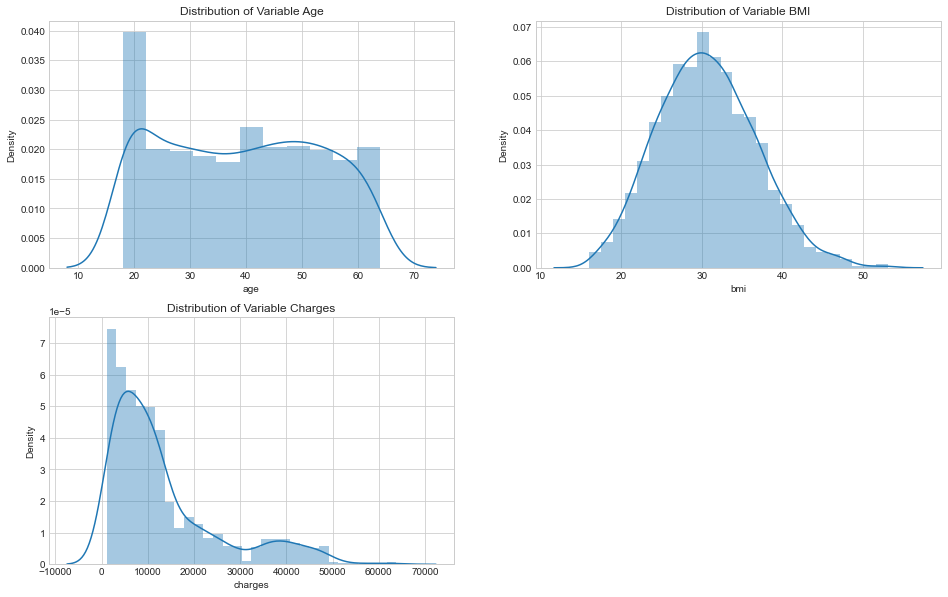

In [31]:
fig = plt.figure(figsize=(16, 10))

plt.subplot(221)
ax1 = sns.distplot(df["age"])
plt.title(f"Distribution of Variable Age")

plt.subplot(222)
ax2 = sns.distplot(df["bmi"])
plt.title(f"Distribution of Variable BMI")

plt.subplot(223)
ax3 = sns.distplot(df["charges"])
plt.title(f"Distribution of Variable Charges")

plt.show()

In [32]:
age_x = 40
age_mean = df["age"].mean()
age_std_dev = df["age"].std()
age_probability = norm.cdf(age_x, age_mean, age_std_dev)
age_probability

0.5225042071304686

In [33]:
bmi_x = 25
bmi_mean = df["bmi"].mean()
bmi_std_dev = df["bmi"].std()
bmi_probability = norm.cdf(bmi_x, bmi_mean, bmi_std_dev)
bmi_probability

0.17652183661410747

In [34]:
1 - bmi_probability

0.8234781633858925

In [35]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Correlation Coefficient

$$ \rho (X,Y)=\frac{Cov(X,Y)}{\sqrt{\sigma _{X}^{2}}\sqrt{\sigma _{Y}^{2}}} $$

In [ ]:
df1 = df.copy()

In [36]:
df1["smoker"] = df1["smoker"].map({"yes": 1, "no": 0})
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [37]:
df1["sex"] = df1["sex"].map({"female": 1, "male": 0})
df1["region"] = df1["region"].map({
    "southwest": 0, 
    "southeast": 1, 
    "northwest": 2, 
    "northeast": 3,
})

df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [38]:
df1.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


<AxesSubplot:>

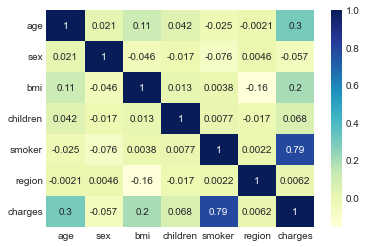

In [39]:
sns.heatmap(
    data=df1.corr(),
    cmap="YlGnBu",
    annot=True)

### Statistical Testing

$$H_0: \mu_{smokerCharges} > \mu_{nonSmokerCharges}$$
$$H_1: \mu_{smokerCharges} < \mu_{nonSmokerCharges}$$

$$ z = \frac{\hat{p}_1-\hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_1}+\frac{1}{n_2})}} $$

In [5]:
sample_data = df.sample(frac=0.1)
smoker_charges_sample = sample_data[sample_data["smoker"] == "yes"]["charges"]
non_smoker_charges_sample = sample_data[sample_data["smoker"] == "no"]["charges"]

if smoker_charges_sample.std() == non_smoker_charges_sample.std():
    usevar = "pooled"
else:
    usevar = "unequal"


t_test, p_value, dof = weightstats.ttest_ind(smoker_charges_sample, 
                                             non_smoker_charges_sample,
                                             alternative="smaller",
                                             usevar=usevar)

print("t-statistic value is: ", t_test)
print("p-value is: ", p_value)


t-statistic value is:  11.603172955503322
p-value is:  0.9999999999999772


In [21]:
sample_data_2 = df.sample(frac=.1)
male_data = sample_data_2[sample_data_2["sex"] == "male"]["sex"].count()
female_data = sample_data_2[sample_data_2["sex"] == "female"]["sex"].count()
total_sample = sample_data_2["sex"].count()

# print(male_data, female_data, total_sample)
props = np.array([male_data, female_data])
nobs = np.array([total_sample, total_sample])

z_test, p_value = proportion.proportions_ztest(count=props, 
                                               nobs=nobs, 
                                               alternative="larger")

print("t-statistic value is: ", z_test)
print("p-value is: ", p_value)

(1.954711109700883, 0.025308589026158915)